In [45]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Importing Dataset

In [46]:
df=pd.read_csv(r"C:\Users\HUCON SOLUTIONS PVT\Downloads\avocado.csv\avocado.csv")

In [47]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


# EDA

In [48]:
df.drop('Unnamed: 0',axis=1, inplace=True)

In [49]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


We dont find any missing values in the given dataset

In [51]:
df['Date']=pd.to_datetime(df['Date'])
df['Month']=df['Date'].apply(lambda x:x.month)
df['Day']=df['Date'].apply(lambda x:x.day)
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


In [52]:
df.shape

(18249, 15)

there are 18249 rows and 15 columns in the given dataset

In [53]:
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region', 'Month', 'Day'],
      dtype='object')

In [54]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899,6.177215,15.662612
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938,3.534130,8.776281
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000,1.000000,1.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000,3.000000,8.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000,6.000000,16.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000,9.000000,23.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000,12.000000,31.000000


# Analysis of Average Prices

Text(0.5, 1.0, 'Average Price')

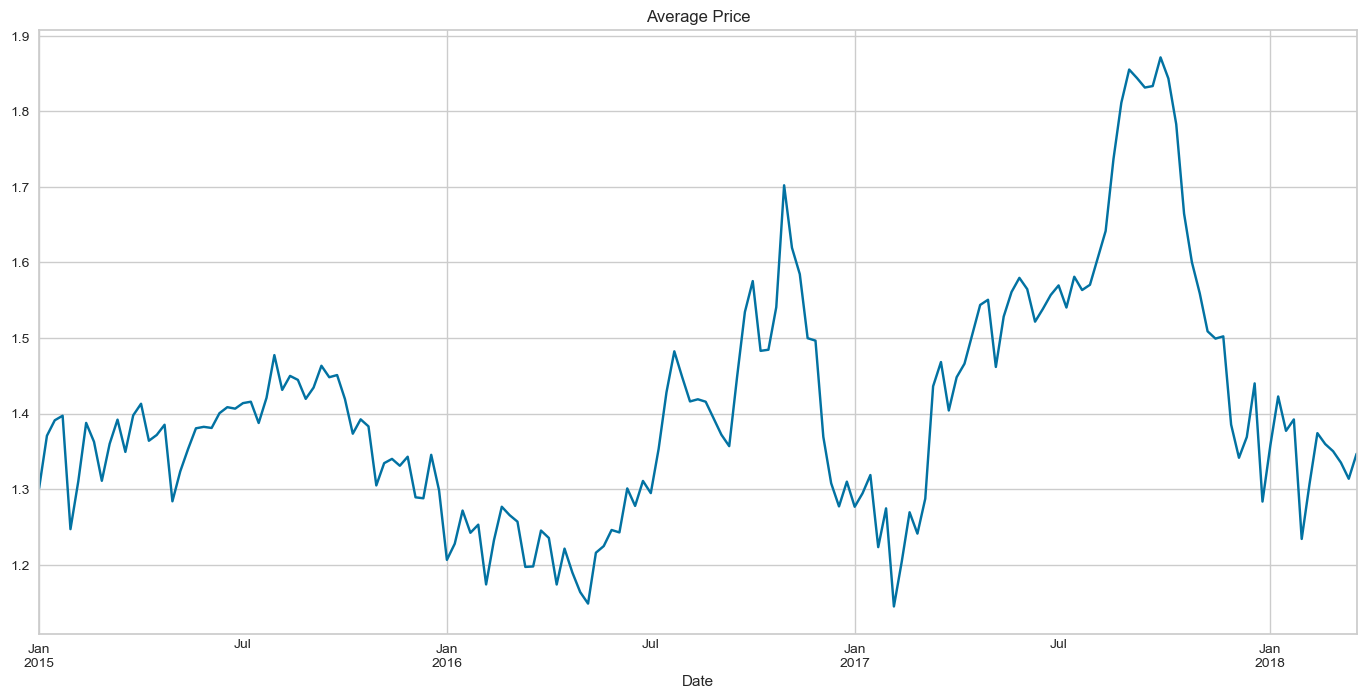

In [55]:
import matplotlib.pyplot as plt
byDate=df.groupby('Date').mean()
plt.figure(figsize=(17,8),dpi=100)
byDate['AveragePrice'].plot()
plt.title('Average Price')

From the above picture, it shows the average price of avocado at various points

Text(0.5, 1.0, 'Average Price Per Month')

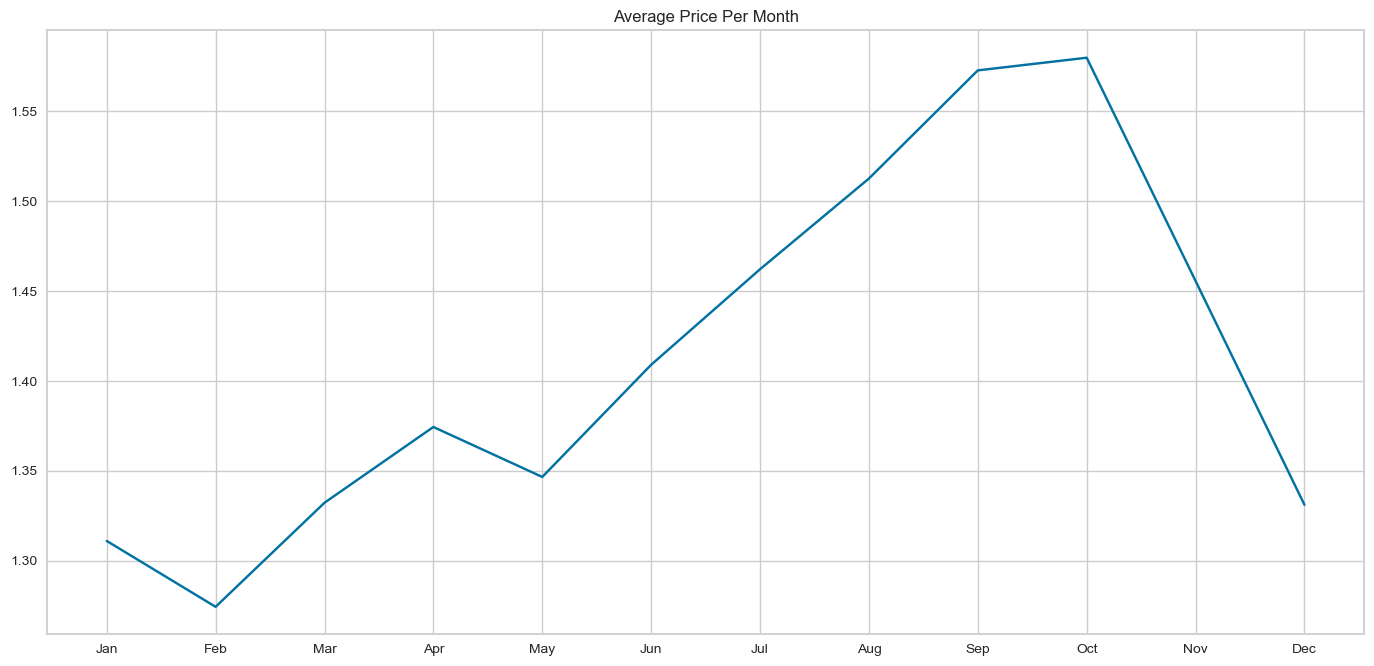

In [56]:
byMonth=df.groupby("Month").mean()
plt.figure(figsize=(17,8),dpi=100)
plt.plot(["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"],byMonth['AveragePrice'])
plt.title('Average Price Per Month')

From the above picture, we can see price variations increased and decreased prices monthly wise

Text(0.5, 1.0, 'Average Price Per Day')

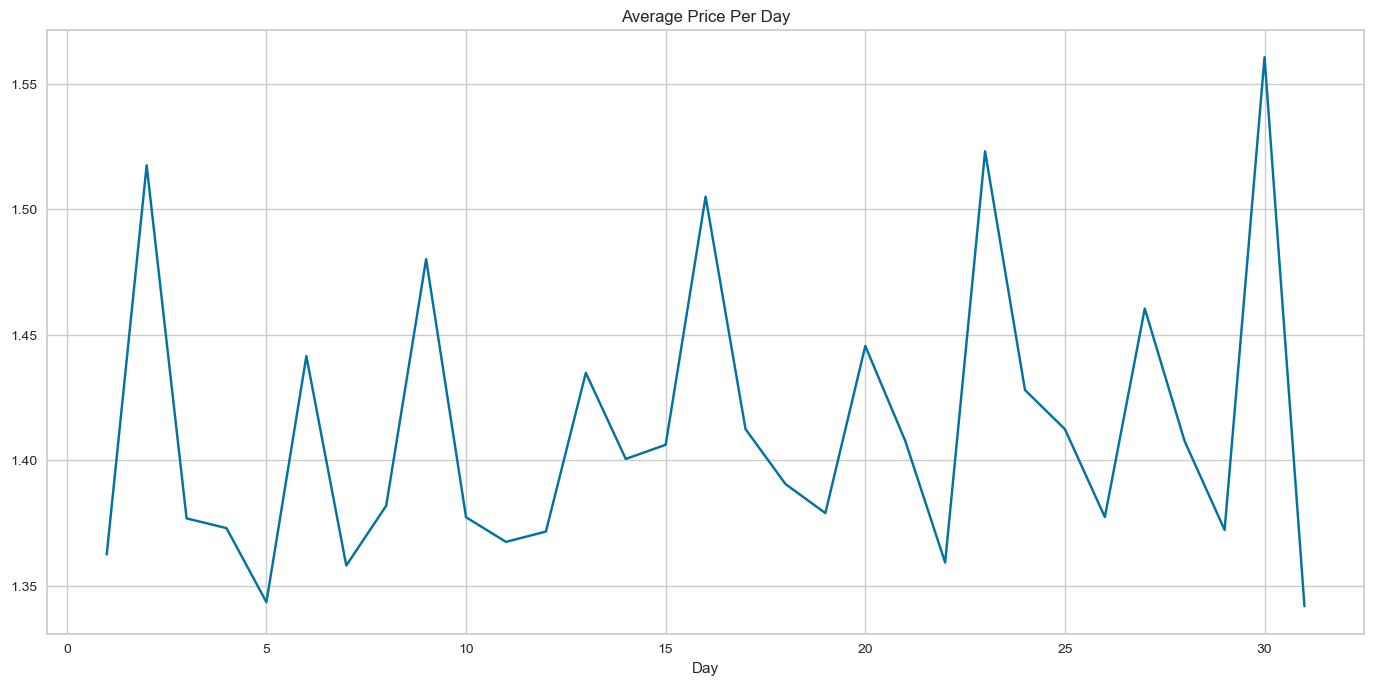

In [57]:
byDay=df.groupby("Day").mean()
plt.figure(figsize=(17,8),dpi=100)
byDay['AveragePrice'].plot()
plt.title('Average Price Per Day')

Text(0.5, 1.0, 'Average Price According to Region')

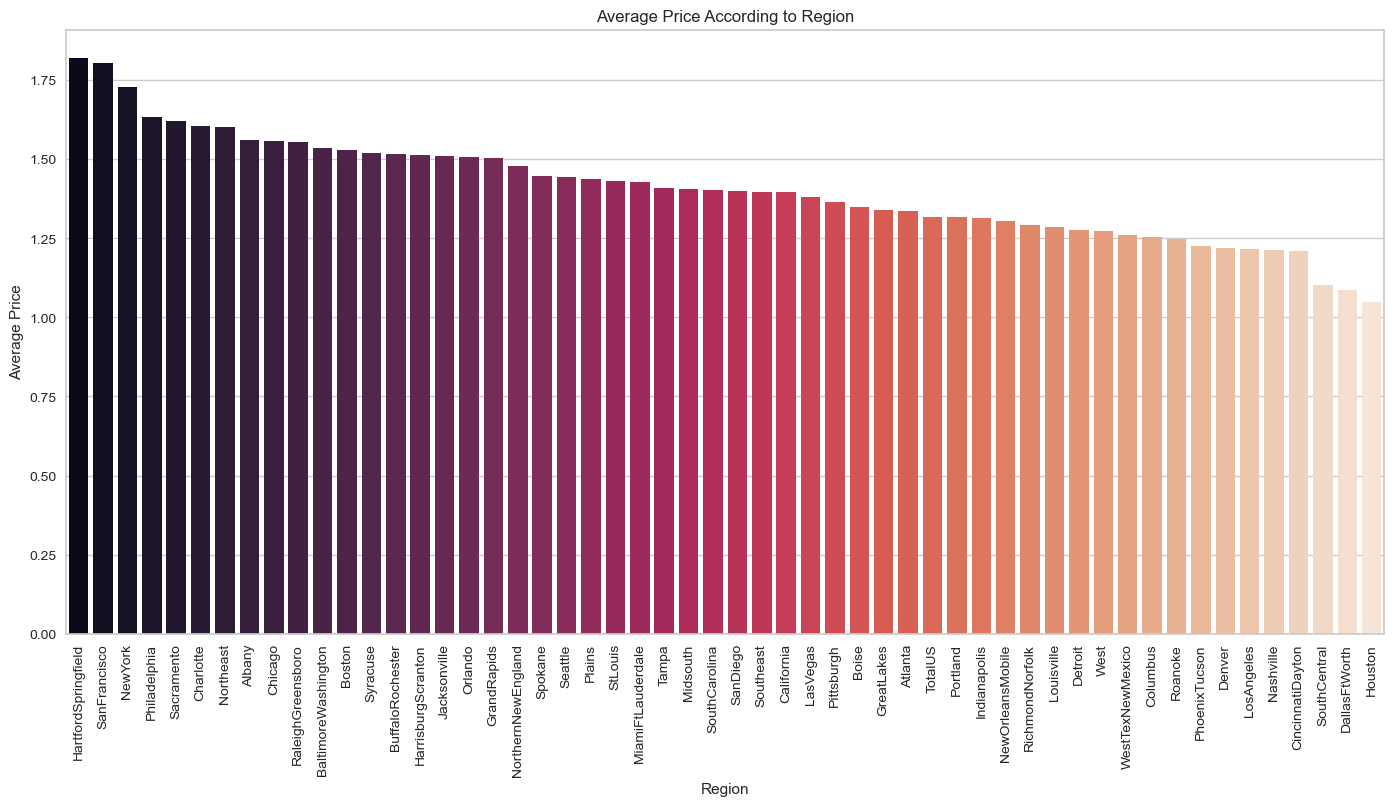

In [58]:
byRegion=df.groupby('region').mean()
byRegion.sort_values(by=['AveragePrice'],ascending=False,inplace=True)
plt.figure(figsize=(17,8),dpi=100)
sns.barplot(x=byRegion.index,y=byRegion["AveragePrice"],data=byRegion,palette='rocket')
plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.title('Average Price According to Region')

the above figure shows clearly that the prices of avocado are high in HartfordSpringField, SanFrancisco, NewYork

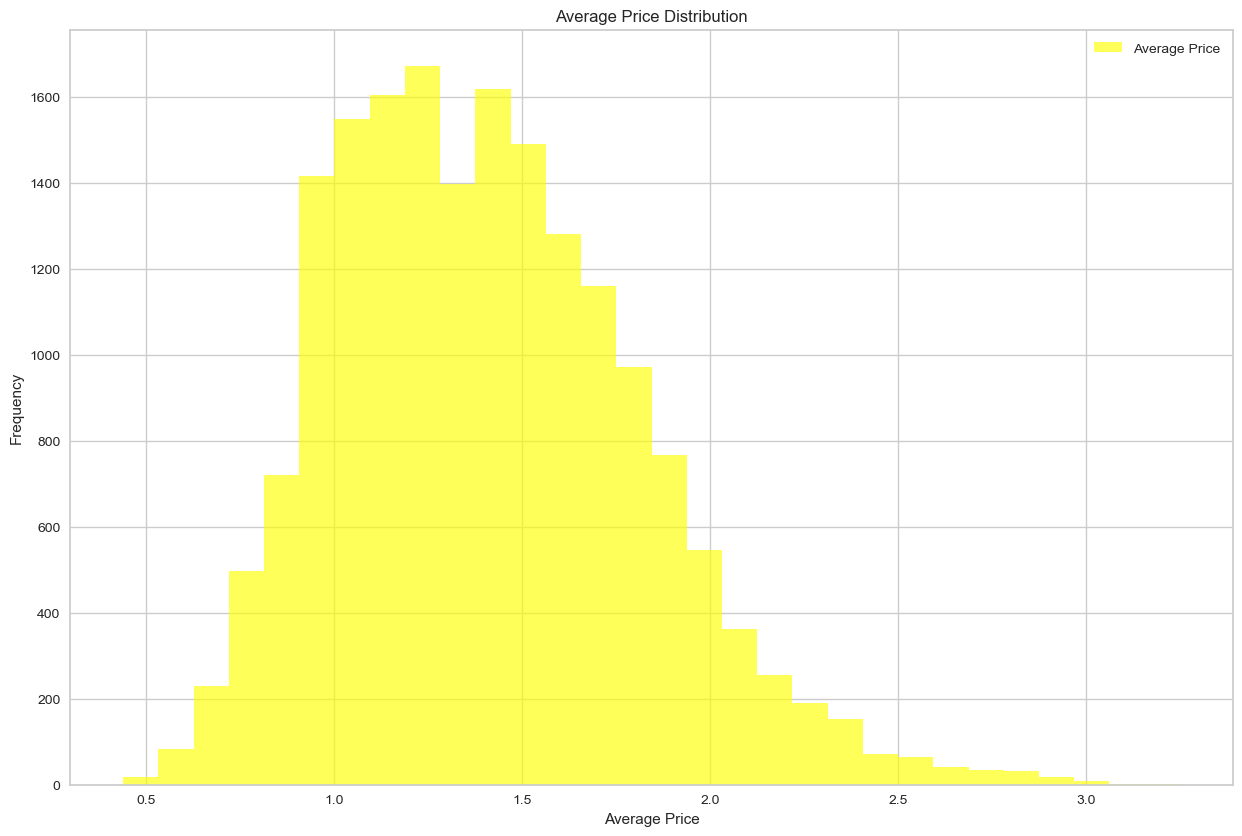

In [59]:
plt.figure(figsize=(15,10),dpi=100)
df["AveragePrice"].plot(kind="hist",color="yellow",bins=30,grid=True,alpha=0.65,label="Average Price")
plt.legend()
plt.xlabel("Average Price")
plt.title("Average Price Distribution")
plt.show()

from the above histogram, the average prices of avocado are some what positively skewed

# Heat Map

<AxesSubplot:>

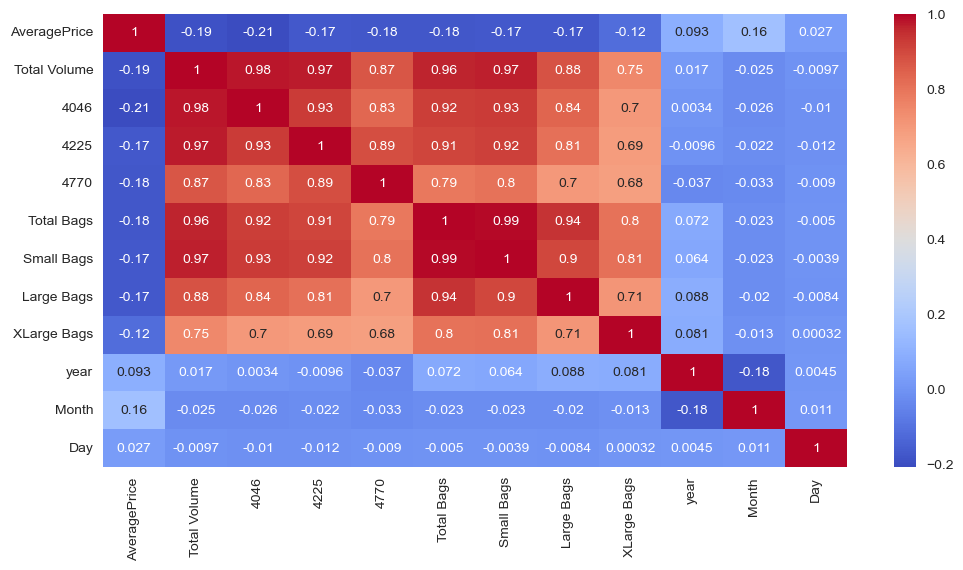

In [60]:
corr_df = df.corr(method='pearson')
plt.figure(figsize=(12,6),dpi=100)
sns.heatmap(corr_df,cmap='coolwarm',annot=True)

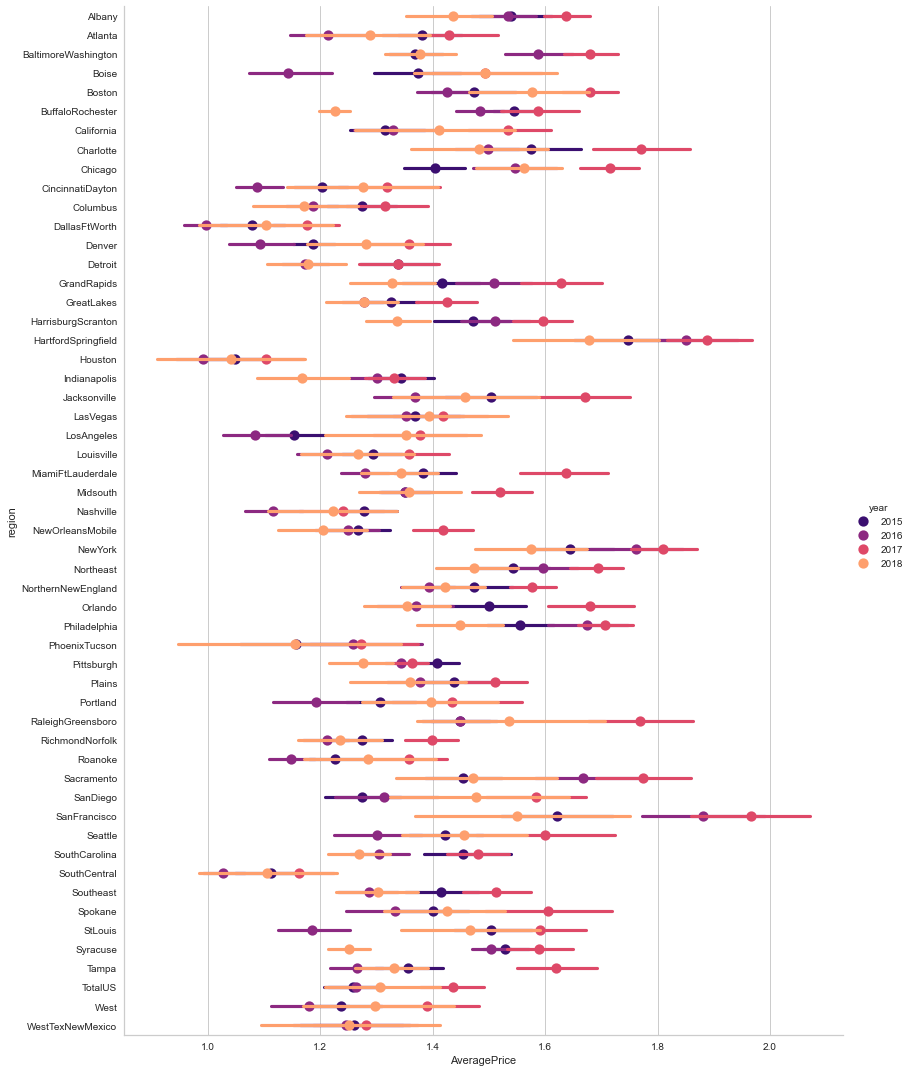

In [61]:
sns.factorplot('AveragePrice','region',data=df,
              hue='year',
              aspect=0.8,
              height=15,
              palette='magma',
              join=False,
              )

Taking care of outliers

<AxesSubplot:>

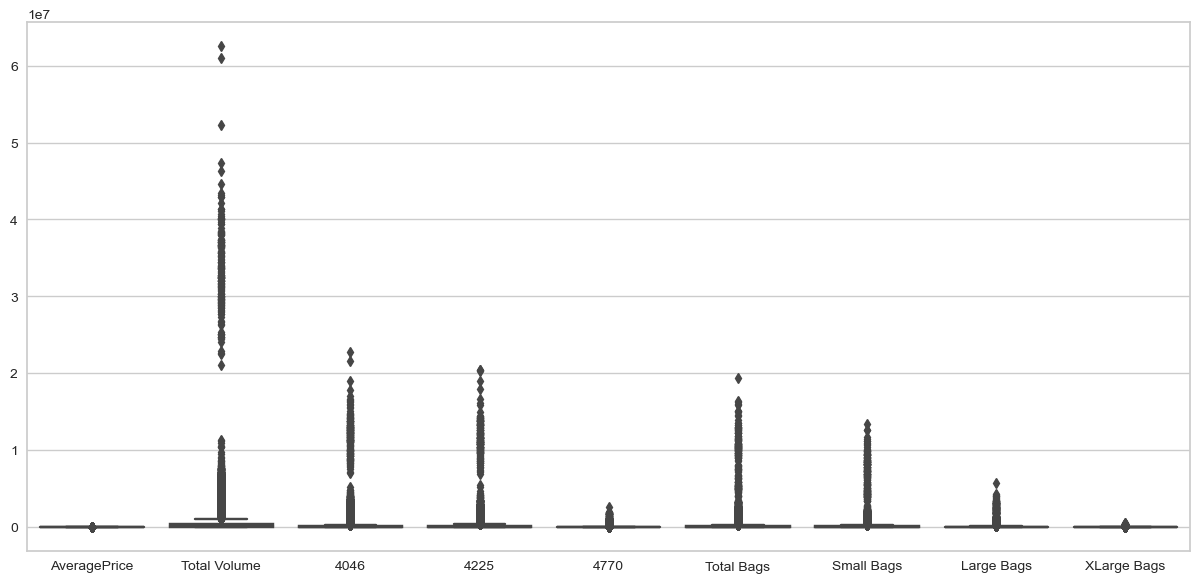

In [62]:
plt.figure(figsize=(15,7),dpi=100)
sns.boxplot(data=df[['AveragePrice','Total Volume',
                     '4046','4225','4770','Total Bags','Small Bags',
                     'Large Bags','XLarge Bags']])

The above boxplot indicates all the variables contains outliers

In [63]:
df.drop(columns=["Date"],inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total Volume  18249 non-null  float64
 2   4046          18249 non-null  float64
 3   4225          18249 non-null  float64
 4   4770          18249 non-null  float64
 5   Total Bags    18249 non-null  float64
 6   Small Bags    18249 non-null  float64
 7   Large Bags    18249 non-null  float64
 8   XLarge Bags   18249 non-null  float64
 9   type          18249 non-null  object 
 10  year          18249 non-null  int64  
 11  region        18249 non-null  object 
 12  Month         18249 non-null  int64  
 13  Day           18249 non-null  int64  
dtypes: float64(9), int64(3), object(2)
memory usage: 1.9+ MB


In [64]:
from numpy import percentile
columns=df.columns
for j in columns:
    if isinstance(df[j][0],str):
        continue
        
    else:
            quartiles=percentile(df[j],[25,75])
            lower_fence=quartiles[0]-(1.5*(quartiles[1]-quartiles[0]))
            upper_fence=quartiles[1]+(1.5*(quartiles[1]-quartiles[0]))
            df[j]=df[j].apply(lambda x:upper_fence if x>upper_fence else (lower_fence if x<lower_fence else x))

In [65]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


<AxesSubplot:>

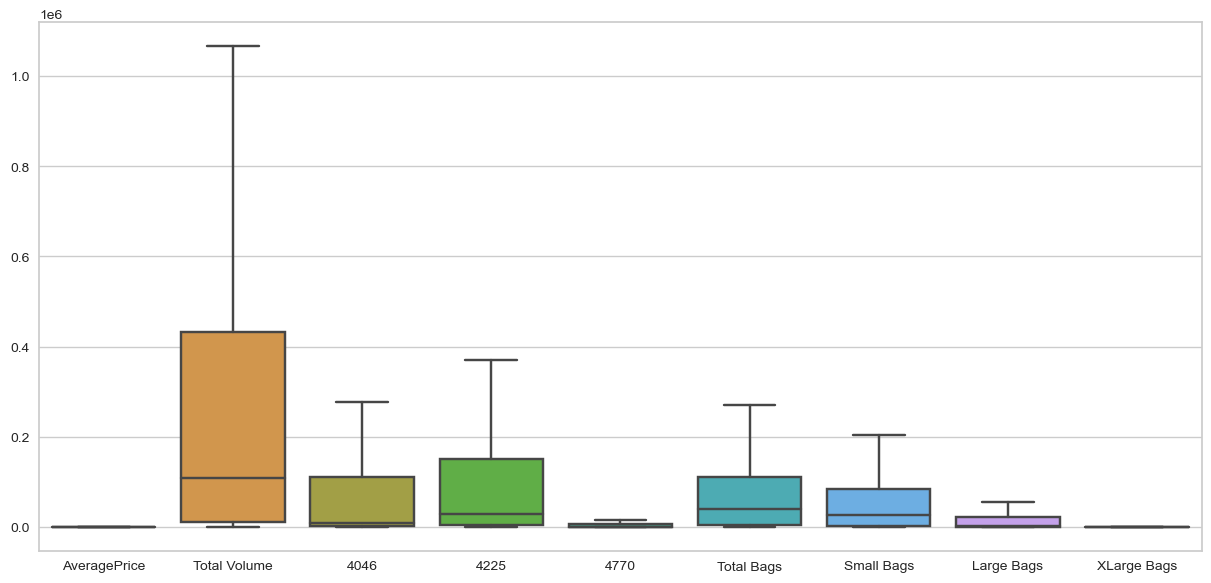

In [66]:
plt.figure(figsize=(15,7),dpi=100)
sns.boxplot(data=df[['AveragePrice',
                     'Total Volume',
                     '4046','4225','4770',
                     'Total Bags','Small Bags','Large Bags','XLarge Bags']])

Categorical Variables:

In [67]:
df['region']=pd.Categorical(df['region'])
dfDummies_region=pd.get_dummies(df['region'],prefix='region')
dfDummies_region

,region_Albany,region_Atlanta,region_BaltimoreWashington,region_Boise,region_Boston,region_BuffaloRochester,region_California,region_Charlotte,region_Chicago,region_CincinnatiDayton,...,region_SouthCarolina,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
18245,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
18246,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
18247,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [68]:
df=pd.concat([df,dfDummies_region],axis=1)
df.drop(columns="region",inplace=True)
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,...,region_SouthCarolina,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,...,0,0,0,0,0,0,0,0,0,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,...,0,0,0,0,0,0,0,0,0,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,...,0,0,0,0,0,0,0,0,0,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,...,0,0,0,0,0,0,0,0,0,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,...,0,0,0,0,0,0,0,0,0,1
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,...,0,0,0,0,0,0,0,0,0,1
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,...,0,0,0,0,0,0,0,0,0,1
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,...,0,0,0,0,0,0,0,0,0,1


Adding one hot encoded columns

In [69]:
df['Month']=pd.Categorical(df['Month'])
dfDummies_month=pd.get_dummies(df['Month'],prefix='month')
dfDummies_month

,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,0,1,0,0,0,0,0,0,0,0,0,0
18245,1,0,0,0,0,0,0,0,0,0,0,0
18246,1,0,0,0,0,0,0,0,0,0,0,0
18247,1,0,0,0,0,0,0,0,0,0,0,0


similarly adding one hot encoding on months

In [70]:
df=pd.concat([df,dfDummies_month], axis=1)
df.drop(columns="Month",inplace=True)
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,...,0,0,0,0,0,0,0,0,0,1
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,...,0,0,0,0,0,0,0,0,0,1
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,...,0,0,0,0,0,0,0,0,0,1
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,...,0,0,0,0,0,0,0,0,0,1
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,...,0,0,0,0,0,0,0,0,0,0
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,...,0,0,0,0,0,0,0,0,0,0
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,...,0,0,0,0,0,0,0,0,0,0
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,...,0,0,0,0,0,0,0,0,0,0


Preprocessing

In [71]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
df['type']=label_encoder.fit_transform(df['type'])
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,...,0,0,0,0,0,0,0,0,0,1
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,...,0,0,0,0,0,0,0,0,0,1
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,...,0,0,0,0,0,0,0,0,0,1
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,...,0,0,0,0,0,0,0,0,0,1
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,...,0,0,0,0,0,0,0,0,0,0
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,...,0,0,0,0,0,0,0,0,0,0
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,...,0,0,0,0,0,0,0,0,0,0
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,...,0,0,0,0,0,0,0,0,0,0


# Model Fitting

splitting our dataset where 80% for training and 20% data for testing

In [72]:
X=df.iloc[:,1:78]
y=df['AveragePrice']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=50)
y_test=np.array(y_test,dtype=float)

# Standard Scaler

In [73]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [74]:
import sklearn.metrics as metrics
def regression_results(y_true,y_pred):
    explained_variance=metrics.explained_variance_score(y_true,y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true,y_pred)
    mse=metrics.mean_squared_error(y_true,y_pred)
    r2=metrics.r2_score(y_true,y_pred)
    adjusted_r2=1-(1-r2)*(len(y_true)-1)/(len(y_true)-X_test.shape[1]-1)
    
    print('Explained_variance:', round(explained_variance,4))
    print('R2:',round(r2,4))
    print('Adjusted_r2:', round(adjusted_r2,4))
    print('MAE:',round(mean_absolute_error,4))
    print('MSE:',round(mse,4))
    print('RMSE:',round(np.sqrt(mse),4))

# K-fold cross validation:

In [75]:
from sklearn.model_selection import cross_val_score
def model_accuracy(model,X_train=X_train,y_train=y_train):
    accuracies=cross_val_score(estimator=model, X=X_train,y=y_train,cv=10)
    print("Accuracy:{:.2f}%".format(accuracies.mean()*100))
    print("Standard Deviation:{:.2f}%".format(accuracies.std()*100))

# Multiple Linear Regression Model

In [76]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
regressor=LinearRegression()
regressor.fit(X_train,y_train)
y_pred=regressor.predict(X_test)
regression_results(y_test,y_pred)
model_accuracy(regressor)


Explained_variance: 0.6665
R2: 0.6664
Adjusted_r2: 0.6592
MAE: 0.1779
MSE: 0.0541
RMSE: 0.2327
Accuracy:64.15%
Standard Deviation:1.49%


In [77]:
!pip install -U yellowbrick

  Using cached scikit_learn-1.1.2-cp39-cp39-win_amd64.whl (7.4 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.0
    Uninstalling scikit-learn-0.24.0:
      Successfully uninstalled scikit-learn-0.24.0


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\HUCON SOLUTIONS PVT\\anaconda3\\Lib\\site-packages\\~~learn\\decomposition\\_cdnmf_fast.cp39-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [78]:
!pip install scikit-learn==0.24

  Using cached scikit_learn-0.24.0-cp39-cp39-win_amd64.whl (6.9 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.1.2
    Uninstalling scikit-learn-1.1.2:
      Successfully uninstalled scikit-learn-1.1.2


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.4 requires scikit-learn>=1.0.0, but you have scikit-learn 0.24.0 which is incompatible.


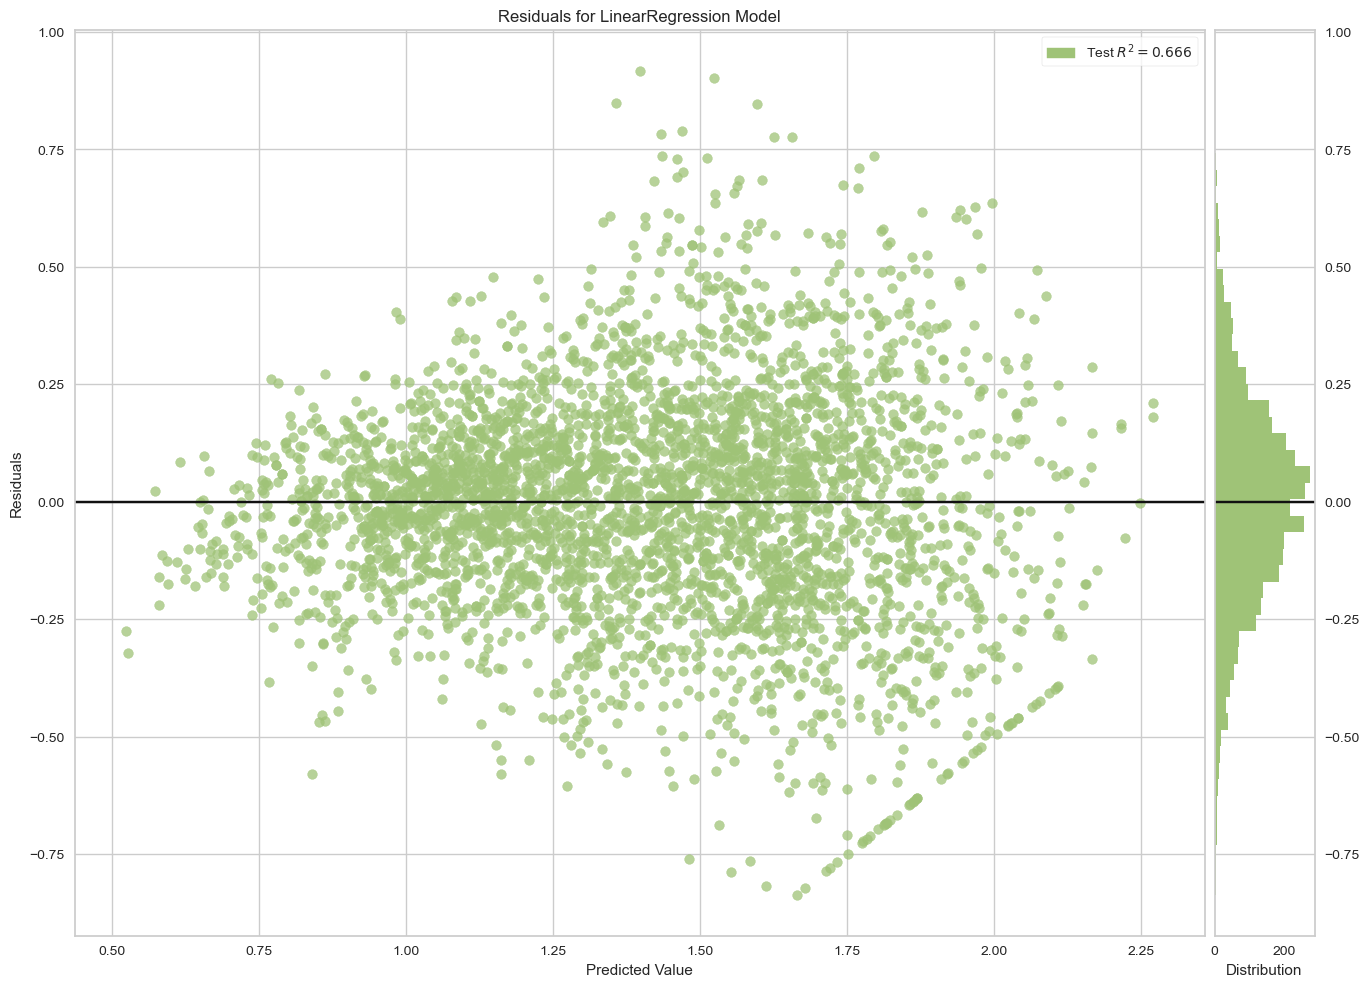

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [79]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

from yellowbrick.regressor import ResidualsPlot

fig=plt.figure(figsize=(16,12),dpi=100)
visualizer=ResidualsPlot(regressor,hist=True,qqplot=False)
visualizer.score(X_test,y_test)
visualizer.show()

#Random Forest Regression Model 

In [80]:
from sklearn.ensemble import RandomForestRegressor
rand_regressor=RandomForestRegressor()
rand_regressor.fit(X_train,y_train)
y_pred_rf=rand_regressor.predict(X_test)
regression_results(y_test,y_pred_rf)
model_accuracy(rand_regressor)

Explained_variance: 0.9042
R2: 0.9042
Adjusted_r2: 0.9021
MAE: 0.0897
MSE: 0.0156
RMSE: 0.1247
Accuracy:88.50%
Standard Deviation:0.58%


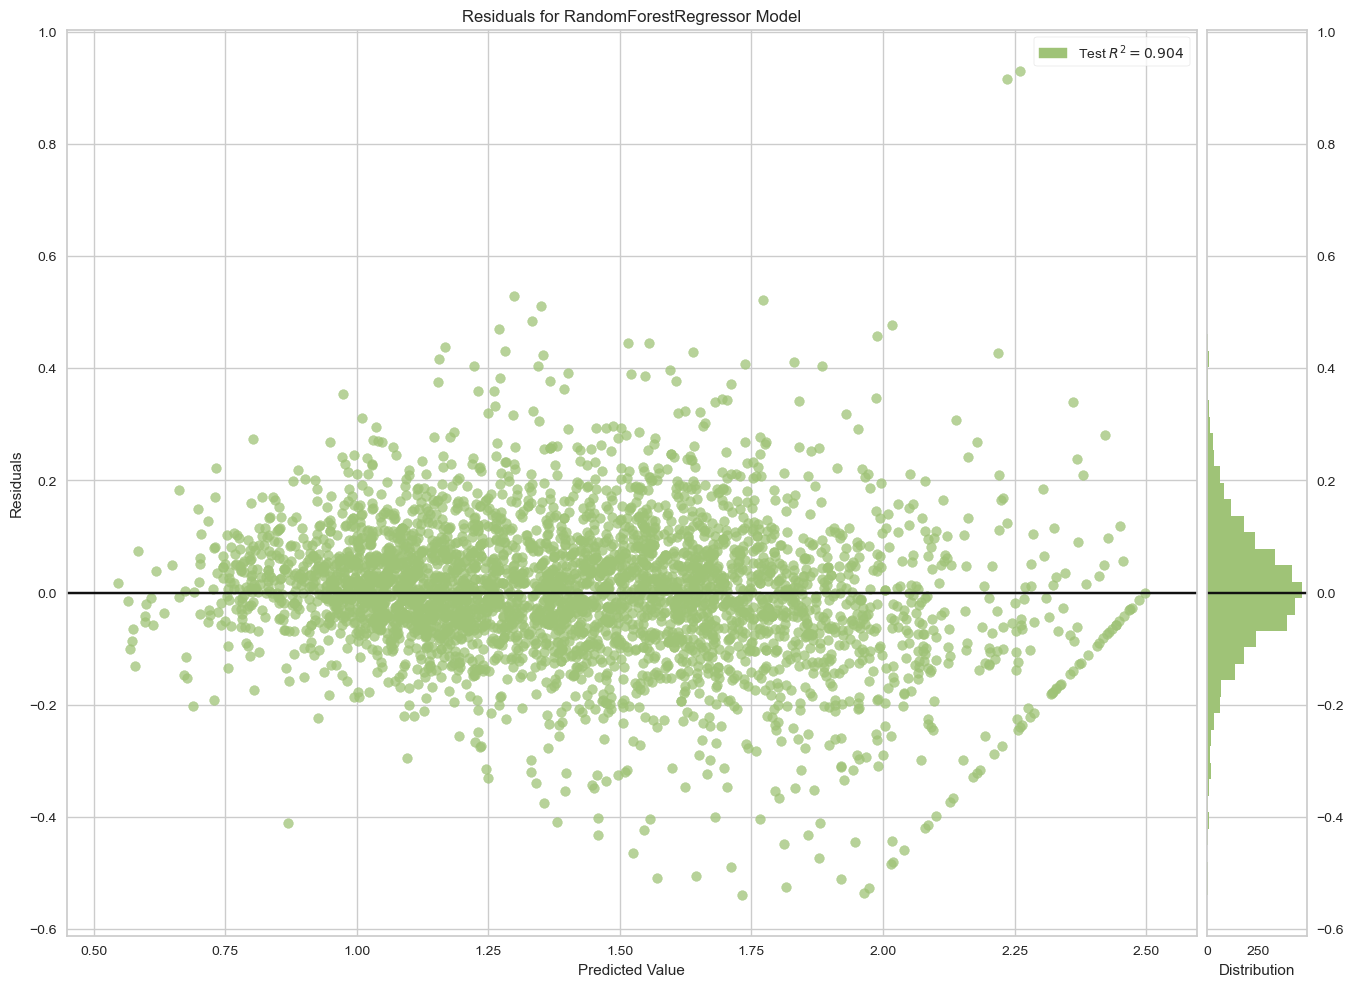

<AxesSubplot:title={'center':'Residuals for RandomForestRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [81]:
fig=plt.figure(figsize=(16,12),dpi=100)
visualizer=ResidualsPlot(rand_regressor,hist=True,qqplot=False)
visualizer.score(X_test,y_test)
visualizer.show()

# Decision Tree Regression Model

In [98]:
from sklearn.tree import DecisionTreeRegressor
decision_tree = DecisionTreeRegressor(criterion='mse',splitter='random',random_state=10)
y_pred_dt=decision_tree.predict(X_test)
regression_results(y_test,y_pred_dt)
model_accuracy(decision_tree)

NotFittedError: This DecisionTreeRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

NotFittedError: This DecisionTreeRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

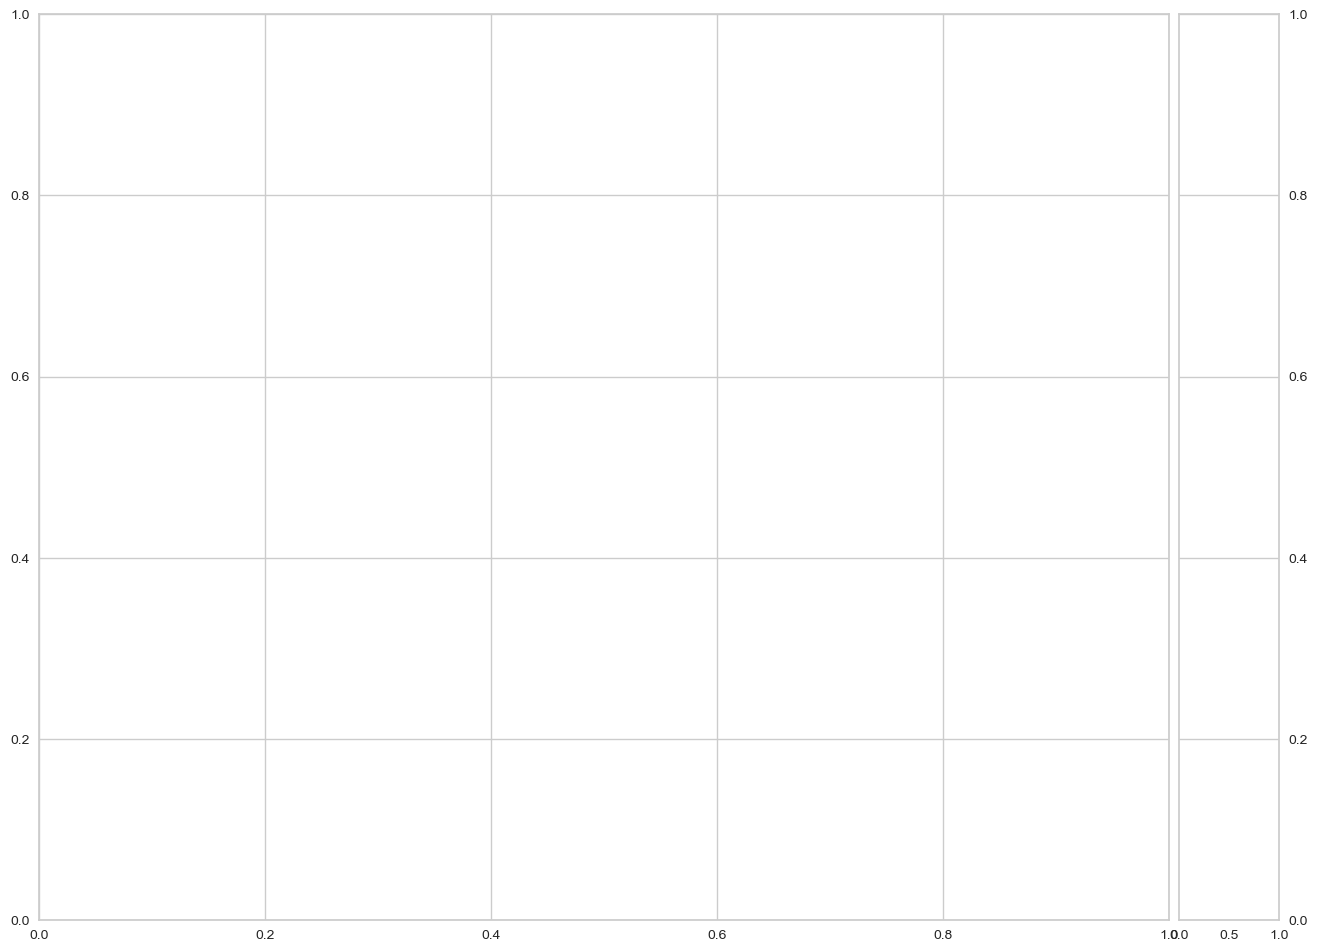

In [97]:
fig=plt.figure(figsize=(16,12),dpi=100)
visualizer=ResidualsPlot(decision_tree,hist=True,qqplot=False)
visualizer.score(X_test,y_test)
visualizer.show()

# Conclusion: Using k-fold cross validation as the basis for model selection, I declare random forest model as the best suited model for our purpose of predicting average avocado prices